In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [6]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
def creat_model():
    model = keras.Sequential(name='myFashionMNIST')
    model.add(keras.layers.Input(shape=(28,28,1)))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2,2)))    
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = creat_model()    

In [58]:
model.summary()

Model: "myFashionMNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 3, 3, 64)      

In [59]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [60]:
batch_size = 32           # @param
epochs  = 100             # @param 
validation_split = 0.2    # @param

es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=3,
                                   verbose=1
                                )

history = model.fit(x=train_images,
                    y=train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    callbacks=[es]
                )  


Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6229 - acc: 0.7727 - val_loss: 0.3914 - val_acc: 0.8593
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4066 - acc: 0.8521 - val_loss: 0.3556 - val_acc: 0.8683
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3629 - acc: 0.8684 - val_loss: 0.2974 - val_acc: 0.8873
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3323 - acc: 0.8795 - val_loss: 0.2861 - val_acc: 0.8932
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3104 - acc: 0.8866 - val_loss: 0.2635 - val_acc: 0.9032
Epoch 6/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2977 - acc: 0.8900 - val_loss: 0.2681 - val_acc: 0.8999
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2822 - acc: 0.8982 - val_loss: 0.2525 - val_acc: 0.9060
Epoch 8/100
1500/1500 [=========================

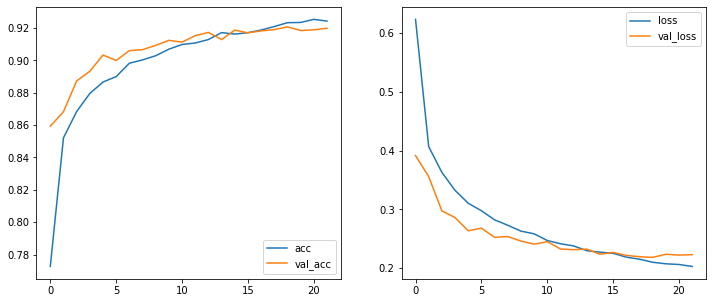

In [61]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [62]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2434 - acc: 0.9150


[0.243356853723526, 0.9150000214576721]